# Constructing Dataset

In [38]:
import os
import numpy as np
import pandas as pd
#variables
folder_path = "datasets/mosquito/"

file_names = ["PCP.csv", "TEMP.csv", "NDVI.csv", "HUM.csv", "FIRE.csv",
              "TEMP_min.csv", "TEMP_max.csv", "HUM_min.csv", "HUM_max.csv", "Mosquito.csv"]
full_dataset = pd.DataFrame()

for file in file_names:
    csv_df = pd.read_csv(folder_path + file)
    full_dataset[file] = csv_df["Average Value"]
feature_cols = ["PCP", "TEMP", "NDVI", "HUM", "FIRE", "TEMP_min", "TEMP_max", "HUM_min", "HUM_max"]
base_cols = feature_cols[:4]
print(base_cols)
fire_cols = ["FIRE"]
variation_cols = feature_cols[5:]
print(variation_cols)
label_cols = ["Mosquito"]
print(label_cols)
full_dataset.columns = feature_cols + label_cols
full_dataset

['PCP', 'TEMP', 'NDVI', 'HUM']
['TEMP_min', 'TEMP_max', 'HUM_min', 'HUM_max']
['Mosquito']


,PCP,TEMP,NDVI,HUM,FIRE,TEMP_min,TEMP_max,HUM_min,HUM_max,Mosquito
0,0.635794,8.262493,0.101116,0.005756,0.0,4.394708,12.131272,61.744289,91.251335,0.000000
1,9.112778,8.418595,0.109617,0.005916,0.0,4.618800,12.219401,64.710086,98.093567,0.000000
2,30.628704,5.322401,-0.006158,0.005394,0.0,3.704554,6.941116,84.920810,94.995057,0.000000
3,11.338366,6.661992,0.086151,0.005167,0.0,3.308578,10.016375,68.086742,94.287721,0.000000
4,13.125853,7.035971,0.111560,0.005507,0.0,3.957993,10.114943,71.277932,94.729380,0.000000
...,...,...,...,...,...,...,...,...,...,...
649,1.478166,18.041810,0.406046,0.005714,0.0,10.754728,25.329033,29.075265,61.410788,6.185714
650,0.003126,25.238278,0.492947,0.006731,0.0,16.047384,34.429308,19.223382,54.888509,7.194805
651,0.004932,24.780549,0.504967,0.006575,0.0,15.436055,34.125179,19.320694,47.929577,11.695652
652,0.102120,21.898674,0.352058,0.008968,0.0,14.842765,28.954724,37.140313,77.605250,25.733333


In [39]:
full_dataset.corr()

,PCP,TEMP,NDVI,HUM,FIRE,TEMP_min,TEMP_max,HUM_min,HUM_max,Mosquito
PCP,1.000000,-0.510786,-0.762138,-0.051380,-0.090281,-0.394251,-0.579659,0.764121,0.495679,-0.335728
TEMP,-0.510786,1.000000,0.631756,0.618106,0.136105,0.983541,0.992604,-0.748015,-0.753848,0.749278
NDVI,-0.762138,0.631756,1.000000,0.135553,0.074413,0.510454,0.701601,-0.827212,-0.569179,0.422162
HUM,-0.051380,0.618106,0.135553,1.000000,-0.073025,0.701961,0.550355,-0.030986,-0.061435,0.478278
FIRE,-0.090281,0.136105,0.074413,-0.073025,1.000000,0.124838,0.141163,-0.172700,-0.206633,0.108414
TEMP_min,-0.394251,0.983541,0.510454,0.701961,0.124838,1.000000,0.954331,-0.630832,-0.692861,0.748525
TEMP_max,-0.579659,0.992604,0.701601,0.550355,0.141163,0.954331,1.000000,-0.812946,-0.780912,0.735956
HUM_min,0.764121,-0.748015,-0.827212,-0.030986,-0.172700,-0.630832,-0.812946,1.000000,0.846193,-0.521228
HUM_max,0.495679,-0.753848,-0.569179,-0.061435,-0.206633,-0.692861,-0.780912,0.846193,1.000000,-0.556233
Mosquito,-0.335728,0.749278,0.422162,0.478278,0.108414,0.748525,0.735956,-0.521228,-0.556233,1.000000


In [40]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PCP       654 non-null    float64
 1   TEMP      654 non-null    float64
 2   NDVI      654 non-null    float64
 3   HUM       654 non-null    float64
 4   FIRE      654 non-null    float64
 5   TEMP_min  654 non-null    float64
 6   TEMP_max  654 non-null    float64
 7   HUM_min   654 non-null    float64
 8   HUM_max   654 non-null    float64
 9   Mosquito  654 non-null    float64
dtypes: float64(10)
memory usage: 51.2 KB


In [41]:
from epiweeks import Week, Year
from datetime import date as Date
#add week objects into dataset
weeks = []
starting_week = Week(2010, 1)
for i in full_dataset.index:
    weeks.append(starting_week + i)
weeks = pd.Series(weeks)
full_dataset = full_dataset.assign(Week = lambda x: weeks)
full_dataset

,PCP,TEMP,NDVI,HUM,FIRE,TEMP_min,TEMP_max,HUM_min,HUM_max,Mosquito,Week
0,0.635794,8.262493,0.101116,0.005756,0.0,4.394708,12.131272,61.744289,91.251335,0.000000,201001
1,9.112778,8.418595,0.109617,0.005916,0.0,4.618800,12.219401,64.710086,98.093567,0.000000,201002
2,30.628704,5.322401,-0.006158,0.005394,0.0,3.704554,6.941116,84.920810,94.995057,0.000000,201003
3,11.338366,6.661992,0.086151,0.005167,0.0,3.308578,10.016375,68.086742,94.287721,0.000000,201004
4,13.125853,7.035971,0.111560,0.005507,0.0,3.957993,10.114943,71.277932,94.729380,0.000000,201005
...,...,...,...,...,...,...,...,...,...,...,...
649,1.478166,18.041810,0.406046,0.005714,0.0,10.754728,25.329033,29.075265,61.410788,6.185714,202224
650,0.003126,25.238278,0.492947,0.006731,0.0,16.047384,34.429308,19.223382,54.888509,7.194805,202225
651,0.004932,24.780549,0.504967,0.006575,0.0,15.436055,34.125179,19.320694,47.929577,11.695652,202226
652,0.102120,21.898674,0.352058,0.008968,0.0,14.842765,28.954724,37.140313,77.605250,25.733333,202227


In [42]:
#convert date into real date
import datetime
dates = []
for w in full_dataset["Week"]:
    dates.append(w.startdate())
dates = pd.Series(dates)
full_dataset = full_dataset.assign(Date = lambda x: dates)
full_dataset

,PCP,TEMP,NDVI,HUM,FIRE,TEMP_min,TEMP_max,HUM_min,HUM_max,Mosquito,Week,Date
0,0.635794,8.262493,0.101116,0.005756,0.0,4.394708,12.131272,61.744289,91.251335,0.000000,201001,2010-01-03
1,9.112778,8.418595,0.109617,0.005916,0.0,4.618800,12.219401,64.710086,98.093567,0.000000,201002,2010-01-10
2,30.628704,5.322401,-0.006158,0.005394,0.0,3.704554,6.941116,84.920810,94.995057,0.000000,201003,2010-01-17
3,11.338366,6.661992,0.086151,0.005167,0.0,3.308578,10.016375,68.086742,94.287721,0.000000,201004,2010-01-24
4,13.125853,7.035971,0.111560,0.005507,0.0,3.957993,10.114943,71.277932,94.729380,0.000000,201005,2010-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...
649,1.478166,18.041810,0.406046,0.005714,0.0,10.754728,25.329033,29.075265,61.410788,6.185714,202224,2022-06-12
650,0.003126,25.238278,0.492947,0.006731,0.0,16.047384,34.429308,19.223382,54.888509,7.194805,202225,2022-06-19
651,0.004932,24.780549,0.504967,0.006575,0.0,15.436055,34.125179,19.320694,47.929577,11.695652,202226,2022-06-26
652,0.102120,21.898674,0.352058,0.008968,0.0,14.842765,28.954724,37.140313,77.605250,25.733333,202227,2022-07-03


# Visualizing Data

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
full_dataset.describe()

,PCP,TEMP,NDVI,HUM,FIRE,TEMP_min,TEMP_max,HUM_min,HUM_max,Mosquito
count,6.540000e+02,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,2.852632e+00,16.057133,0.393639,0.005597,0.257999,9.226082,22.888940,33.229583,70.685723,5.819373
std,4.994145e+00,7.522166,0.140855,0.001595,0.892432,6.113600,9.098645,16.063016,16.375205,7.609864
min,0.000000e+00,2.542097,-0.006158,0.001708,0.000000,-3.460871,6.234716,5.228964,25.410854,0.000000
25%,6.016607e-07,9.688391,0.303440,0.004365,0.000000,4.181116,15.067438,20.961113,58.561557,0.000000
50%,2.710793e-01,14.778193,0.430052,0.005397,0.000000,8.093560,22.122076,30.238917,72.488697,2.848077
75%,3.809349e+00,22.800872,0.501174,0.006658,0.000000,14.542862,31.194953,43.295703,84.103653,7.964466
max,3.062870e+01,31.786251,0.660114,0.009930,8.321576,23.098889,40.474607,84.920810,99.530680,53.494505


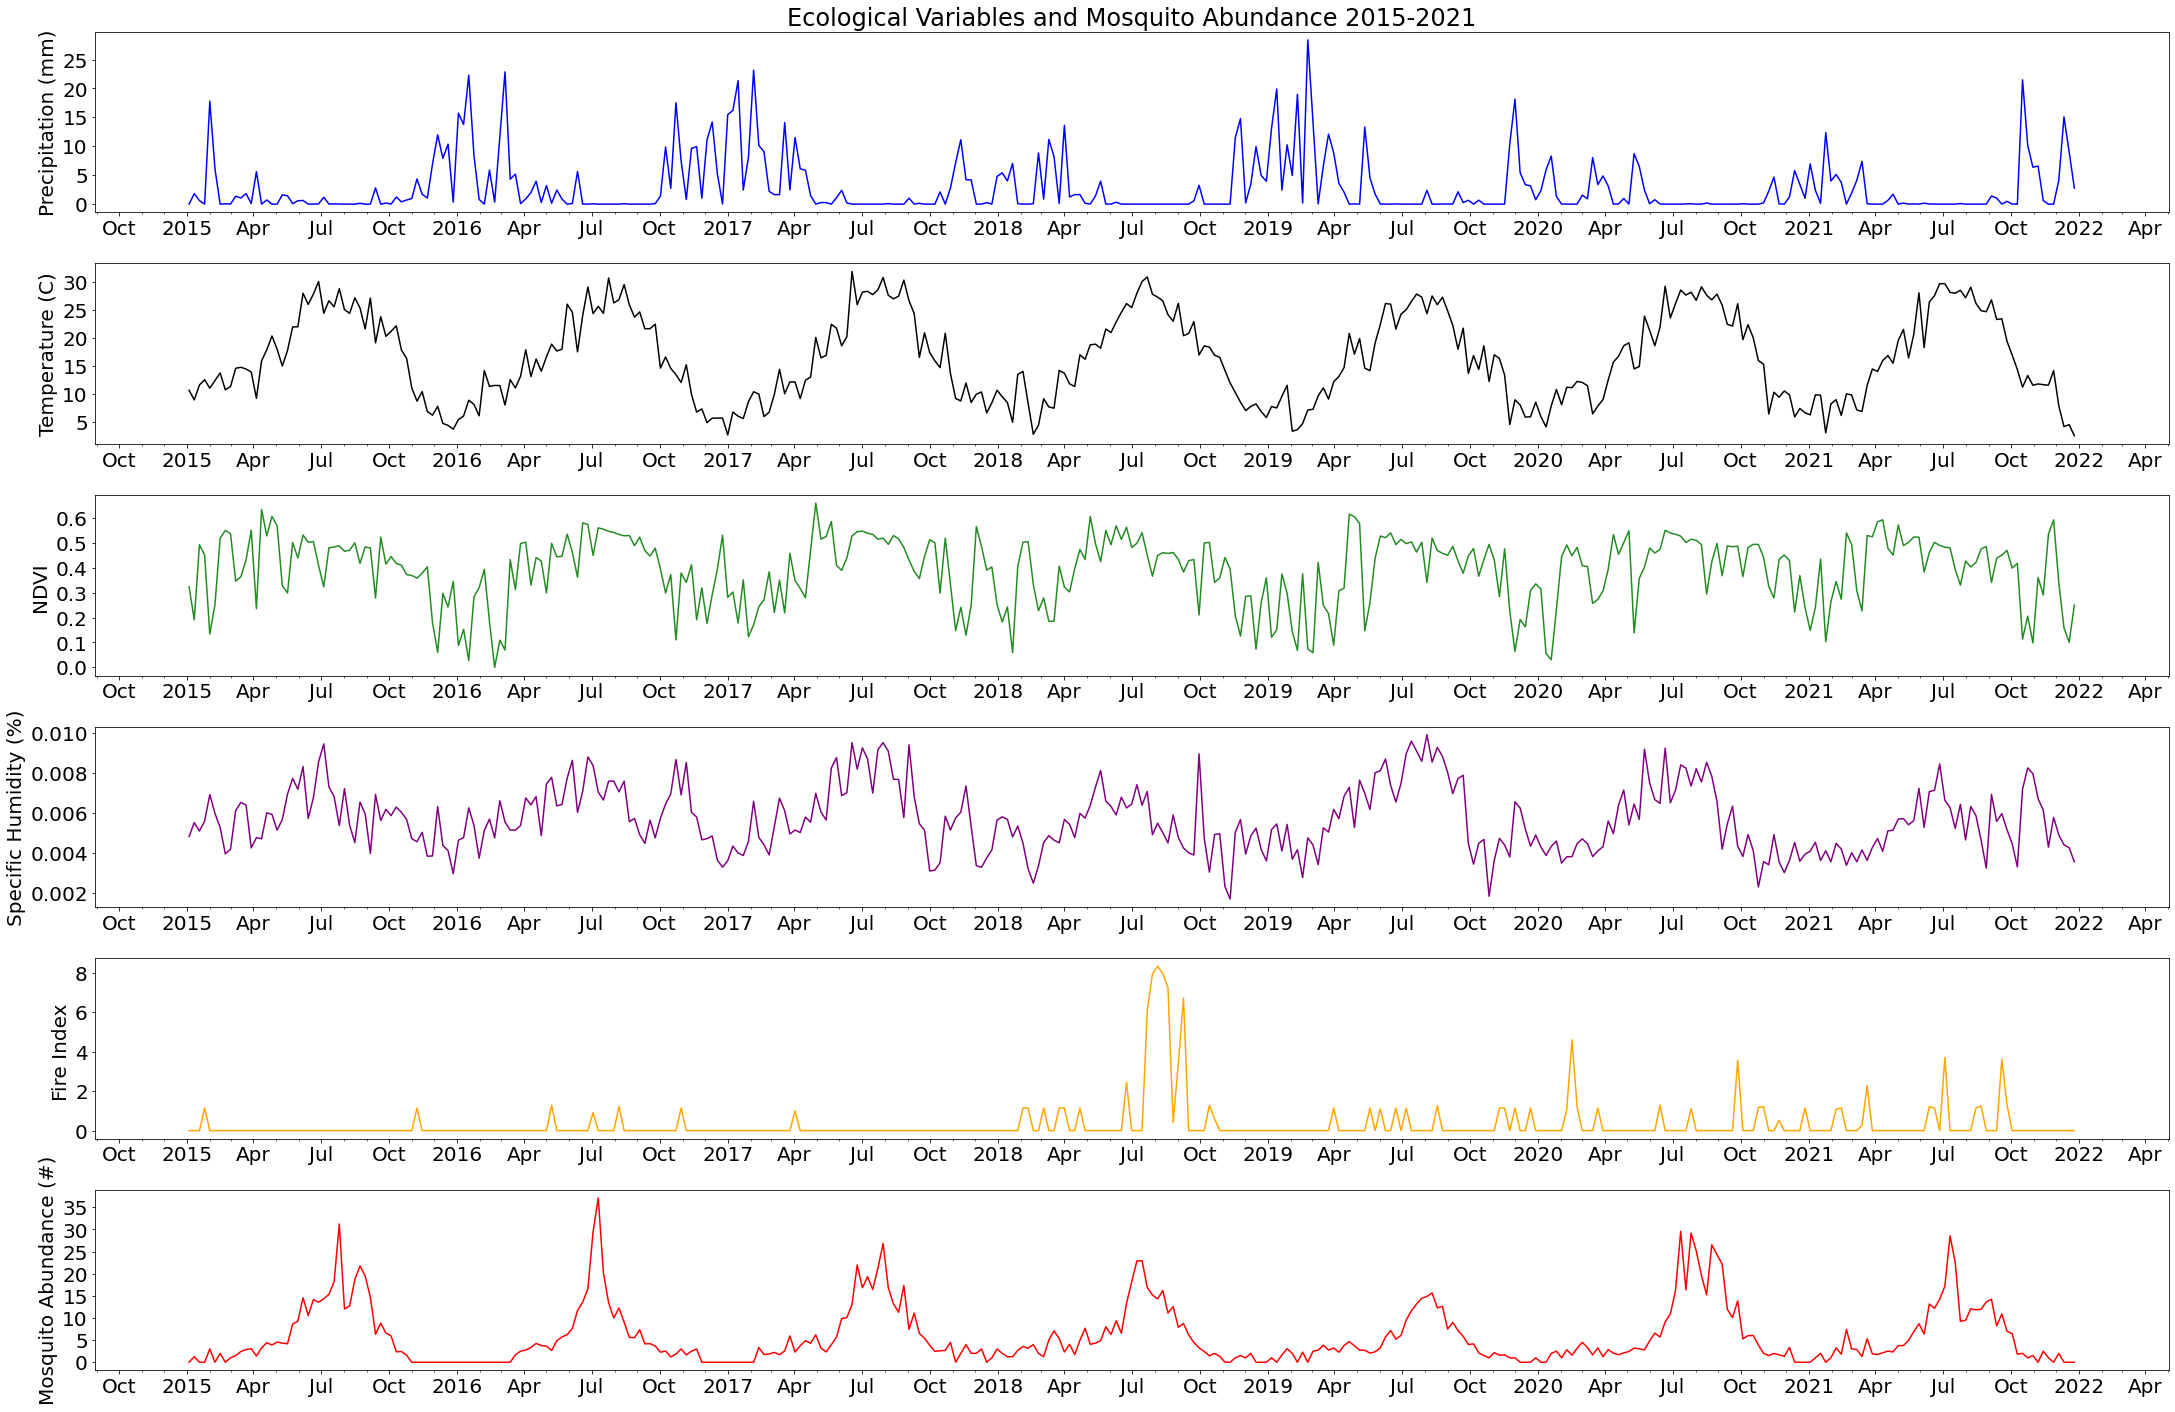

In [44]:
color_palette = {
    "PCP": "blue",
    "TEMP": "black",
    "NDVI": "forestgreen",
    "HUM": "purple",
    "FIRE": "orange",
    "TEMP_min": "teal",
    "TEMP_max": "gray",
    "HUM_min": "violet",
    "HUM_max": "magenta",
    "Mosquito": "red"
}

full_names = {
    "PCP": "Precipitation",
    "TEMP": "Temperature",
    "NDVI": "NDVI",
    "HUM": "Specific Humidity",
    "FIRE": "Fire Index",
    "TEMP_min": "Minimum Daily Temperature",
    "TEMP_max": "Maximum Daily Temperature",
    "HUM_min": "Minimum Relative Humidity",
    "HUM_max": "Maximum Relative Humidity",
    "Mosquito": "Mosquito Abundance"
}

units = {
    "PCP": "(mm)",
    "TEMP": "(C)",
    "NDVI": "",
    "HUM": "(%)",
    "FIRE": "",
    "TEMP_min": "(C)",
    "TEMP_max": "(C)",
    "HUM_min": "(%)",
    "HUM_max": "(%)",
    "Mosquito": "(#)"
}

#filter for year
criterion = full_dataset['Week'].map(lambda x: (x.year >= 2015) & (x.year <= 2021))
plot_dataset = full_dataset[criterion]

#plot
plot_cols = base_cols + fire_cols + label_cols
colors = [color_palette[x] for x in plot_cols]

axes = plot_dataset.plot(
    x="Date", y=plot_cols,
    kind="line", figsize=(30, 20),
    subplots=True,
    color=colors,
    x_compat=True,
    sharex=False,
    fontsize=20,
    legend=False
    )

#looks
fig = axes[0].get_figure()
fig.tight_layout()
fig.subplots_adjust(top=0.965)
axes[0].set_title("Ecological Variables and Mosquito Abundance 2015-2021", fontsize=24)

y_labels = [full_names[x] + " " + units[x] for x in plot_cols]
for i, ax in enumerate(axes):
    ax.set_ylabel(y_labels[i], fontsize=20)
    ax.set_xlabel("")
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

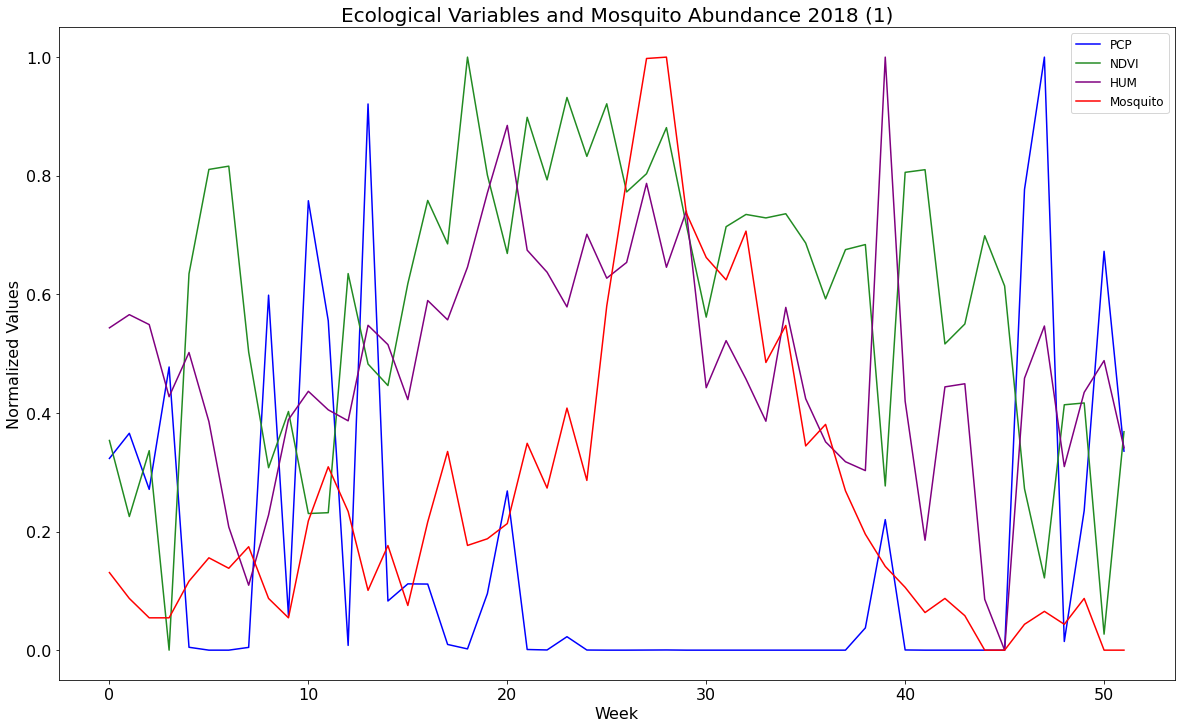

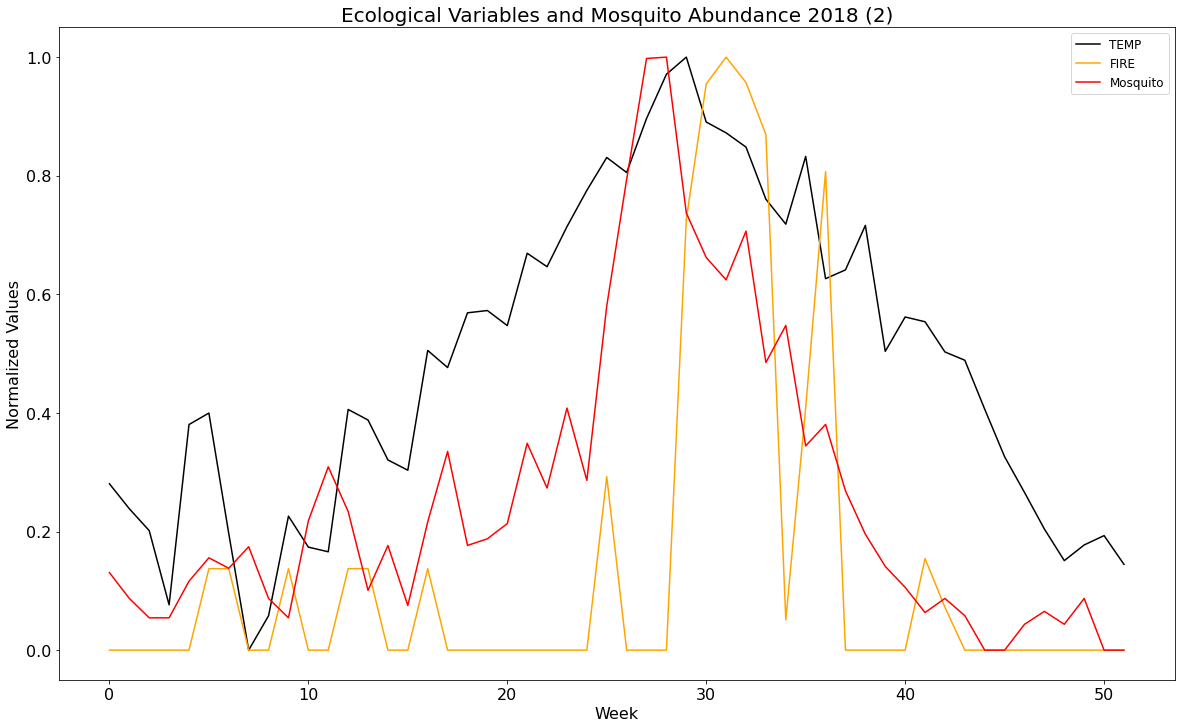

In [45]:
from sklearn.preprocessing import MinMaxScaler
def fix_plot_style(axes):
    for ax in axes:
        ax.set_title(ax.get_title(), fontsize=20)
        ax.set_ylabel(ax.get_ylabel(), fontsize=16)
        ax.set_xlabel(ax.get_xlabel(), fontsize=16)
        ax.legend(fontsize=12)

def plot_year(dataset, year, columns, title="", colors=None, scale=True):
    #colors
    if colors is None:
        colors = [color_palette[x] for x in columns]
    
    #filter year
    criterion = dataset['Week'].map(lambda x: x.year == year)
    plot_dataset = dataset[criterion].copy()
    plot_dataset = plot_dataset.loc[:, columns]
    
    #normalize plot
    if(scale):
        scaler = MinMaxScaler()
        scaled_dataset = scaler.fit_transform(plot_dataset)
        plot_dataset = pd.DataFrame(scaled_dataset, columns=plot_dataset.columns)
    
    #plot
    ax = plot_dataset.plot(
        use_index=True, y=list(plot_dataset.columns), 
        kind="line", figsize=(20, 12),
        color=colors,
        xlabel="Week",
        ylabel="Normalized Values",
        title = title,
        fontsize=16
        )
    
    fix_plot_style([ax])
    
    
plot_year(full_dataset, 2018, ["PCP", "NDVI", "HUM", "Mosquito"],
          title="Ecological Variables and Mosquito Abundance 2018 (1)")
plot_year(full_dataset, 2018, ["TEMP", "FIRE", "Mosquito"], 
          title="Ecological Variables and Mosquito Abundance 2018 (2)")

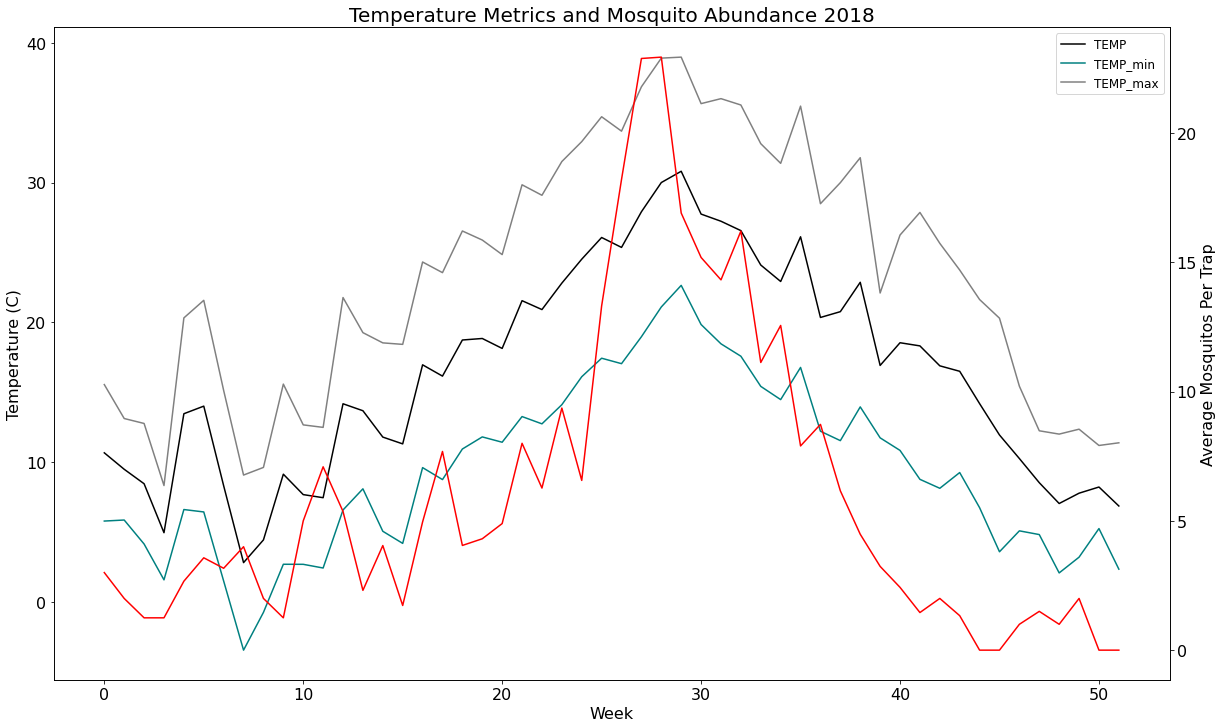

In [46]:
#double plot of temp metrics vs mosquito abundance
criterion = full_dataset['Week'].map(lambda x: x.year == 2018)
plot_dataset = full_dataset[criterion].copy()
plot_dataset.reset_index(inplace=True, drop=True)
plot_cols = ["TEMP", "TEMP_min", "TEMP_max", "Mosquito"]

#plot
ax = plot_dataset.plot(
        use_index=True, y=plot_cols, 
        kind="line", figsize=(20, 12),
        color=[color_palette[x] for x in plot_cols],
        xlabel="Week",
        ylabel="Temperature (C)",
        title="Temperature Metrics and Mosquito Abundance 2018",
        secondary_y=["Mosquito"],
        fontsize=16
        )

#look
ax.right_ax.set_ylabel("Average Mosquitos Per Trap", fontsize=16)
fix_plot_style([ax])

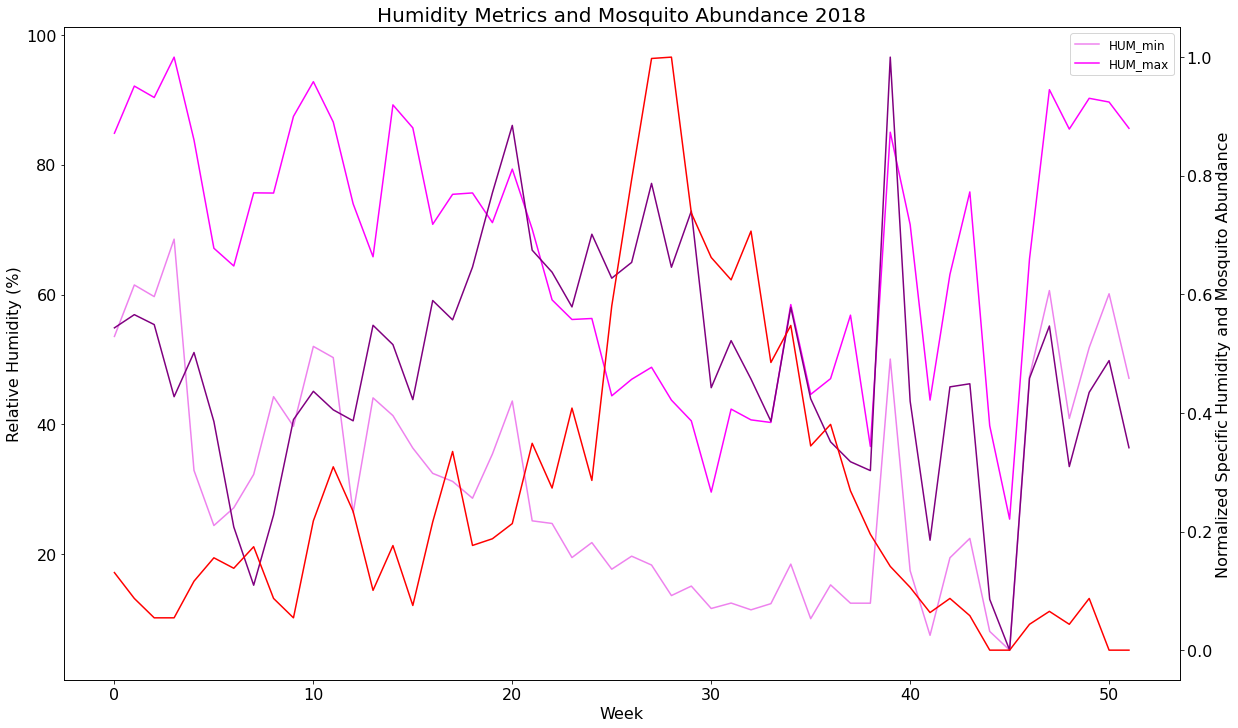

In [47]:
#double plot of relative hum vs specific hum and mosquito abundance
criterion = full_dataset['Week'].map(lambda x: x.year == 2018)
plot_dataset = full_dataset[criterion].copy()
plot_dataset.reset_index(inplace=True, drop=True)
plot_cols = ["HUM_min", "HUM_max", "HUM", "Mosquito"]

#scale hum and mosquito
scaler = MinMaxScaler()
scaled_cols = scaler.fit_transform(plot_dataset.loc[:, ["HUM", "Mosquito"]])
plot_dataset["HUM"] = scaled_cols[:, 0]
plot_dataset["Mosquito"] = scaled_cols[:, 1]

#plot
ax = plot_dataset.plot(
        use_index=True, y=plot_cols, 
        kind="line", figsize=(20, 12),
        color=[color_palette[x] for x in plot_cols],
        xlabel="Week",
        ylabel="Relative Humidity (%)",
        title="Humidity Metrics and Mosquito Abundance 2018",
        secondary_y=["HUM", "Mosquito"],
        fontsize=16
        )

#looks
ax.right_ax.set_ylabel("Normalized Specific Humidity and Mosquito Abundance", fontsize=16)
fix_plot_style([ax])

## Introduce Lag

In [48]:
#try lag
def lag_data(data, column_lags):
    df = data.copy()
    #turn lags into leads 
    for col, lag in column_lags.items():
        df[col] = df[col].shift(lag)
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


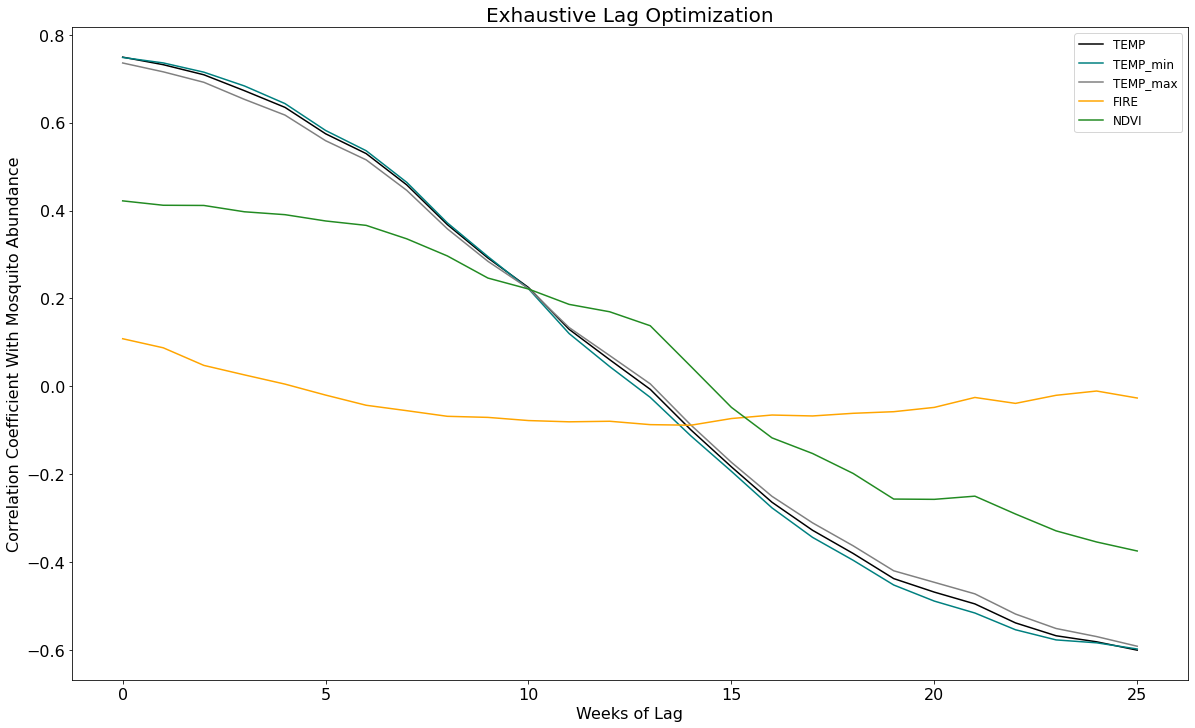

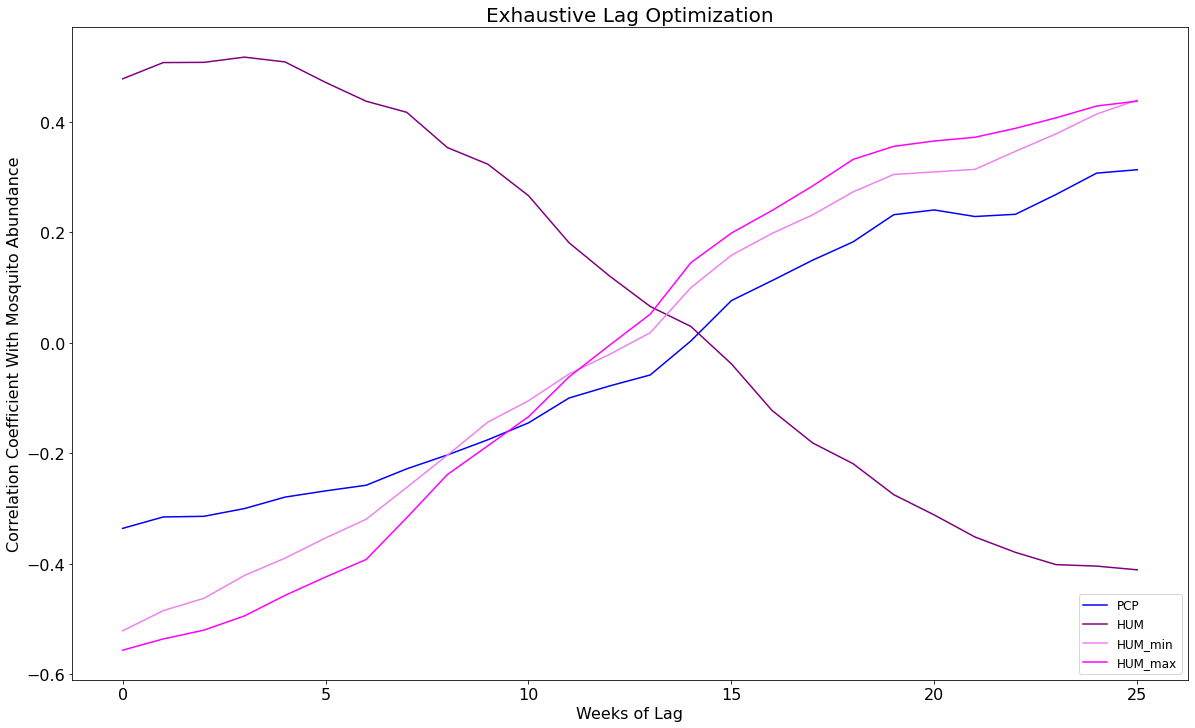

In [49]:
#exhaustively testing lag
from scipy import stats

r_vals = pd.DataFrame(columns=feature_cols)

for i in range(26):
    lag_dict = {col: i for col in feature_cols}
        
    temp = lag_data(full_dataset, column_lags=lag_dict)
    new_row = []
    print(type(temp[col][0]))
    for col in feature_cols:
        new_row.append(stats.pearsonr(temp[col], temp["Mosquito"])[0])
    r_vals.loc[r_vals.shape[0]] = new_row

group1 = ["TEMP", "TEMP_min", "TEMP_max", "FIRE", "NDVI"]
ax1 = r_vals.plot(
        use_index=True, y=group1, 
        kind="line", figsize=(20, 12),
        color=[color_palette[x] for x in group1],
        xlabel="Weeks of Lag",
        ylabel="Correlation Coefficient With Mosquito Abundance",
        title="Exhaustive Lag Optimization",
        fontsize=16
        )

group2 = [c for c in feature_cols if c not in group1]
ax2 = r_vals.plot(
        use_index=True, y=group2, 
        kind="line", figsize=(20, 12),
        color=[color_palette[x] for x in group2],
        xlabel="Weeks of Lag",
        ylabel="Correlation Coefficient With Mosquito Abundance",
        title="Exhaustive Lag Optimization",
        fontsize=16
        )

fix_plot_style([ax1, ax2])

In [50]:
#results
results = pd.DataFrame(columns=["Best Lag", "Best Pearson's R"], index=r_vals.columns)
results.index.name = "Feature"
for col in r_vals.columns:
    results.loc[col] = [r_vals[col].abs().idxmax(), r_vals[col].abs().max()]
display(results)

final_lags = {row: results.loc[row][0] for row in results.index}
lagged_dataset = lag_data(full_dataset, column_lags=final_lags)
lagged_dataset

,Best Lag,Best Pearson's R
Feature,,
PCP,0,0.335728
TEMP,0,0.749278
NDVI,0,0.422162
HUM,3,0.517505
FIRE,0,0.108414
TEMP_min,0,0.748525
TEMP_max,0,0.735956
HUM_min,0,0.521228
HUM_max,0,0.556233


,PCP,TEMP,NDVI,HUM,FIRE,TEMP_min,TEMP_max,HUM_min,HUM_max,Mosquito,Week,Date
0,11.338366,6.661992,0.086151,0.005756,0.0,3.308578,10.016375,68.086742,94.287721,0.000000,201004,2010-01-24
1,13.125853,7.035971,0.111560,0.005916,0.0,3.957993,10.114943,71.277932,94.729380,0.000000,201005,2010-01-31
2,3.483291,7.581499,0.175942,0.005394,0.0,3.377638,11.786325,60.004863,95.510013,0.000000,201006,2010-02-07
3,1.416003,11.477736,0.459124,0.005167,0.0,5.335405,17.621084,43.531601,91.187505,0.000000,201007,2010-02-14
4,11.420121,7.345870,0.224737,0.005507,0.0,2.836859,11.855879,56.616503,92.020477,0.000000,201008,2010-02-21
...,...,...,...,...,...,...,...,...,...,...,...,...
646,1.478166,18.041810,0.406046,0.006605,0.0,10.754728,25.329033,29.075265,61.410788,6.185714,202224,2022-06-12
647,0.003126,25.238278,0.492947,0.006190,0.0,16.047384,34.429308,19.223382,54.888509,7.194805,202225,2022-06-19
648,0.004932,24.780549,0.504967,0.008157,0.0,15.436055,34.125179,19.320694,47.929577,11.695652,202226,2022-06-26
649,0.102120,21.898674,0.352058,0.005714,0.0,14.842765,28.954724,37.140313,77.605250,25.733333,202227,2022-07-03


## Splitting Data

In [51]:
from sklearn.model_selection import train_test_split

#create category for year
year_dataset = lagged_dataset.copy()
year_dataset["Year"] = [x.year for x in year_dataset["Week"]]
year_dataset["Year"] = year_dataset["Year"].astype("category")

#split data
train_dataset, test_dataset = train_test_split(year_dataset, test_size=0.2, random_state=45, stratify=year_dataset["Year"])
display(train_dataset)
display(test_dataset)

,PCP,TEMP,NDVI,HUM,FIRE,TEMP_min,TEMP_max,HUM_min,HUM_max,Mosquito,Week,Date,Year
474,28.404180,7.131967,0.073806,0.003704,0.000000,4.462186,9.802689,61.407398,77.999988,0.000000,201909,2019-02-24,2019
592,0.000000,27.993452,0.522944,0.005733,0.000000,18.544518,37.442524,16.820629,48.680199,8.706897,202122,2021-05-30,2021
412,0.256250,6.619223,0.391284,0.005347,0.000000,1.263034,11.976420,39.154190,82.071248,0.000000,201751,2017-12-17,2017
496,0.000000,27.230817,0.503137,0.008984,0.000000,18.845987,35.615747,22.117529,56.614154,14.454545,201931,2019-07-28,2019
328,0.149573,18.853086,0.498095,0.006835,1.285714,11.617891,26.089301,37.678506,79.018560,2.680000,201619,2016-05-08,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,8.715483,8.321028,0.318286,0.006163,0.000000,2.749623,13.892564,42.929226,75.920774,2.476190,202215,2022-04-10,2022
38,11.429039,15.395991,0.282660,0.004317,0.000000,9.978798,20.814181,41.132859,64.204010,3.500000,201042,2010-10-17,2010
463,3.479479,7.771747,0.287041,0.005041,0.000000,3.192604,12.351862,51.832899,90.239345,2.000000,201850,2018-12-09,2018
461,14.782380,8.523432,0.125537,0.002331,0.000000,4.810368,12.237471,60.622182,91.568197,1.500000,201848,2018-11-25,2018


,PCP,TEMP,NDVI,HUM,FIRE,TEMP_min,TEMP_max,HUM_min,HUM_max,Mosquito,Week,Date,Year
601,0.000000,27.097424,0.427204,0.006278,0.000000,17.815268,36.379719,10.022651,36.614350,9.500000,202131,2021-08-01,2021
295,0.000000,23.742608,0.523710,0.005964,0.000000,14.464694,33.021463,14.614998,58.164775,8.820513,201538,2015-09-20,2015
529,8.047976,6.442772,0.256782,0.004483,0.000000,1.199718,11.685921,47.461817,84.020625,1.666667,202012,2020-03-15,2020
123,2.854066,16.381430,0.413347,0.006308,0.000000,9.320415,23.443442,27.837495,62.813875,5.400000,201223,2012-06-03,2012
275,0.000863,17.946162,0.568351,0.004722,0.000000,9.755374,26.137960,23.635790,55.345931,4.553191,201518,2015-05-03,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.007222,28.729423,0.488409,0.009473,0.000000,20.031220,37.428661,12.818542,35.858238,31.253731,201530,2015-07-26,2015
561,0.000000,15.923393,0.494018,0.003836,1.172099,7.046297,24.800592,7.362116,43.080121,3.888889,202044,2020-10-25,2020
472,18.998727,3.623126,0.068320,0.004113,0.000000,0.138320,7.108736,64.867630,93.101543,0.000000,201907,2019-02-10,2019
615,6.578536,11.767764,0.361266,0.007208,0.000000,6.601394,16.934272,51.642340,96.805836,0.000000,202145,2021-11-07,2021


In [52]:
#check stratify
check_stratification = pd.DataFrame(columns=["Full", "Train", "Test", "Train_Error", "Test_Error"], 
                                    index=year_dataset["Year"].unique())
check_stratification["Full"] = year_dataset["Year"].value_counts().sort_index() / len(year_dataset)
check_stratification["Train"] = train_dataset["Year"].value_counts().sort_index() / len(train_dataset)
check_stratification["Test"] = test_dataset["Year"].value_counts().sort_index() / len(test_dataset)

#errors
check_stratification = check_stratification.assign(Train_Error = lambda x: 100 * np.abs(x.Train - x.Full) / x.Full)
check_stratification = check_stratification.assign(Test_Error = lambda x: 100 * np.abs(x.Test - x.Full) / x.Full)

check_stratification

,Full,Train,Test,Train_Error,Test_Error
2010,0.075269,0.075000,0.076336,0.357143,1.417666
2011,0.079877,0.078846,0.083969,1.290680,5.123312
2012,0.079877,0.080769,0.076336,1.116864,4.433353
2013,0.079877,0.080769,0.076336,1.116864,4.433353
2014,0.081413,0.080769,0.083969,0.791001,3.139853
2015,0.079877,0.078846,0.083969,1.290680,5.123312
2016,0.079877,0.078846,0.083969,1.290680,5.123312
2017,0.079877,0.080769,0.076336,1.116864,4.433353
2018,0.079877,0.080769,0.076336,1.116864,4.433353
2019,0.079877,0.080769,0.076336,1.116864,4.433353


## Data Cleaning

In [53]:
#custom transformer to leave useful columns
from sklearn.base import BaseEstimator, TransformerMixin
class Column_Filterer(BaseEstimator, TransformerMixin):
    def __init__(self, columns): # no *args or **kargs
        self.cols = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): #returns a df with only useful columns
        return X.loc[:, self.cols]

filter = Column_Filterer(feature_cols)
filter.fit_transform(train_dataset) #just testing it

,PCP,TEMP,NDVI,HUM,FIRE,TEMP_min,TEMP_max,HUM_min,HUM_max
474,28.404180,7.131967,0.073806,0.003704,0.000000,4.462186,9.802689,61.407398,77.999988
592,0.000000,27.993452,0.522944,0.005733,0.000000,18.544518,37.442524,16.820629,48.680199
412,0.256250,6.619223,0.391284,0.005347,0.000000,1.263034,11.976420,39.154190,82.071248
496,0.000000,27.230817,0.503137,0.008984,0.000000,18.845987,35.615747,22.117529,56.614154
328,0.149573,18.853086,0.498095,0.006835,1.285714,11.617891,26.089301,37.678506,79.018560
...,...,...,...,...,...,...,...,...,...
637,8.715483,8.321028,0.318286,0.006163,0.000000,2.749623,13.892564,42.929226,75.920774
38,11.429039,15.395991,0.282660,0.004317,0.000000,9.978798,20.814181,41.132859,64.204010
463,3.479479,7.771747,0.287041,0.005041,0.000000,3.192604,12.351862,51.832899,90.239345
461,14.782380,8.523432,0.125537,0.002331,0.000000,4.810368,12.237471,60.622182,91.568197


In [54]:
class DataFrame_Converter(BaseEstimator, TransformerMixin):
    def __init__(self, columns): # no *args or **kargs
        self.cols = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): #returns a df with only useful columns
        return pd.DataFrame(X, columns=self.cols)

    
#standardizing data
from sklearn.preprocessing import StandardScaler

#building pipeline
from sklearn.pipeline import Pipeline
base_pipeline = Pipeline([
    ('col_filter', Column_Filterer(base_cols)),
    ('scaler', StandardScaler()),
    ('converter', DataFrame_Converter(base_cols))
    ])

In [55]:
base_train_set = base_pipeline.fit_transform(train_dataset)
train_labels = train_dataset["Mosquito"]
base_test_set = base_pipeline.fit_transform(test_dataset)
test_labels = test_dataset["Mosquito"]

# Test Hyperparameter Optimization

## No Optimization

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
def root_mean_squared_error(y_pred, y_true):
    mse = mean_squared_error(y_pred, y_true)
    return np.sqrt(mse)

#Util function
def calc_accuracy(model, X_test, y_test, scoring):
    predictions = model.predict(X_test)
    measurements = []
    metric_names = []
    for m in scoring:
        measurements.append(m(y_test, predictions))
        metric_names.append(m.__name__)
    output = pd.DataFrame(data={'Metric':metric_names, 'Measurement':np.array(measurements)})
    output.set_index('Metric', inplace=True)
    return output

In [57]:
from sklearn.ensemble import RandomForestRegressor
base_model = RandomForestRegressor(random_state=45)
base_model.fit(base_train_set, train_labels)

RandomForestRegressor(random_state=45)

In [58]:
calc_accuracy(base_model, base_test_set, test_labels, [r2_score, mean_absolute_error, root_mean_squared_error])
#actually cannot use mean absolute percentage error although it is a common regression metric
#too many values close to zero, leads to extremely large number

,Measurement
Metric,
r2_score,0.517397
mean_absolute_error,2.932542
root_mean_squared_error,4.739668


In [64]:
from joblib import dump, load
dump(base_model, "final_models/base_no_opt.pkl")

['final_models/base_no_opt.pkl']

In [65]:
calc_accuracy(load("final_models/base_no_opt.pkl"), base_test_set, test_labels, [r2_score, mean_absolute_error, root_mean_squared_error])

,Measurement
Metric,
r2_score,0.517397
mean_absolute_error,2.932542
root_mean_squared_error,4.739668


## Grid Search Optimization


In [66]:
# SETUP run above
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 400, 600, 800, 1000],
    "max_depth": [20, 40, 60, 80, 100],
    "max_samples": [0.4, 0.6, 0.8, 1],
    "min_samples_leaf": [2, 4, 6, 8],
    'max_features': [1, 4, "sqrt"],
    } 
forest_reg = RandomForestRegressor(random_state=45)
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1)
grid_search.fit(base_train_set, train_labels)
print(grid_search.best_params_)
print(-grid_search.best_score_)

{'max_depth': 20, 'max_features': 'sqrt', 'max_samples': 0.8, 'min_samples_leaf': 6, 'n_estimators': 400}
4.475957688653397


In [67]:
calc_accuracy(grid_search.best_estimator_, base_test_set, test_labels, [r2_score, mean_absolute_error, root_mean_squared_error])

,Measurement
Metric,
r2_score,0.618526
mean_absolute_error,2.683430
root_mean_squared_error,4.213911


In [68]:
grid_search.best_estimator_.feature_importances_

array([0.08879136, 0.63325301, 0.08457158, 0.19338405])

In [69]:
dump(grid_search.best_estimator_, "final_models/base_grid_opt.pkl")

['final_models/base_grid_opt.pkl']

# Test Features

In [70]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from ray.tune.sklearn import TuneSearchCV
from scipy import stats
from skopt import space
import skopt

C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\tune_sklearn\list_searcher.py:7: DeprecationWarning: The module `ray.tune.suggest` has been moved to `ray.tune.search` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest` with `ray.tune.search`.
  from ray.tune.suggest.suggestion import Searcher
C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\tune_sklearn\list_searcher.py:7: DeprecationWarning: The module `ray.tune.suggest.suggestion` has been moved to `ray.tune.search.searcher` and the old location will be deprecated soon. Please adjust your imports to point to the new location.
ATTENTION: This module may have been split or refactored. Please check the contents of `ray.tune.search.searcher` before making changes.
  from ray.tune.suggest.suggestion import Searcher
C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-package

In [71]:
#SETUP run this cell
#TODO: on paper talk about how we used CV to evaluate everything so that we wouldn't be optimizing for the test set
#this way test set is still a good measure of our true performance
def prepare_data(datasets, columns):
    custom_pipeline = Pipeline([
        ('col_filter', Column_Filterer(columns)),
        ('scaler', StandardScaler()),
        ('converter', DataFrame_Converter(columns))
        ])
    
    output = []
    for dataset in datasets:
        output.append(custom_pipeline.fit_transform(dataset))
    return output

#returns trained model as well as processed x train and test
def create_model(X_train, y_train, n_trials=50):
    rf = RandomForestRegressor(random_state=45)
    
    params = {
        "n_estimators": space.Integer(100, 600), 
        "max_depth": space.Integer(10, 60),
        "max_samples": space.Real(0.2, 1),
        "min_samples_leaf": space.Integer(1, 20),
        "max_features": space.Integer(1, 5), #["sqrt", "log2"],
        "max_leaf_nodes": space.Integer(10, 100)
        }
    
    search = TuneSearchCV(
        rf,
        param_distributions = params,
        search_optimization="bayesian",
        scoring="neg_root_mean_squared_error",
        n_trials=n_trials,
        cv=10,
        random_state=45,
        n_jobs=-1
        )
    
    search.fit(X_train, y_train)
    return search

def find_best_model(X_train, y_train, X_test, y_test, column_list, n_trials=50):
    output = pd.DataFrame(columns=["CV Score", "Test Set Score", "Model"])
    for i, column_set in enumerate(column_list):
        X_train_, X_test_ = prepare_data([X_train, X_test], columns=column_set)
        result = create_model(X_train_, y_train, n_trials)
        cv_score = result.best_score_
        temp = calc_accuracy(result.best_estimator_, X_test_, y_test, [root_mean_squared_error])
        test_set_score = temp.iloc[0, 0]
        output.loc[i] = [cv_score, test_set_score, result.best_estimator_]
    return output.sort_values(by="CV Score", axis=0, ascending=False)
#using CV score to evaluate everything so final test set score is pure (not optimized for)
#machinelearningmastery.com/difference-test-validation-datasets/

In [72]:
#SETUP run
temp_min_cols = ['TEMP_min' if x == 'TEMP' else x for x in base_cols]
temp_max_cols = ['TEMP_max' if x == 'TEMP' else x for x in base_cols]
hum_min_cols = ['HUM_min' if x == 'HUM' else x for x in base_cols]
hum_max_cols = ['HUM_max' if x == 'HUM' else x for x in base_cols]

## Testing Fire

In [74]:
results = find_best_model(train_dataset, train_labels, test_dataset, test_labels, 
               [["PCP", "TEMP", "NDVI", "HUM"],
               ["PCP", "TEMP", "NDVI", "HUM", "FIRE"]],
               n_trials=200)

(pid=21044) C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\tune_sklearn\list_searcher.py:7: DeprecationWarning: The module `ray.tune.suggest` has been moved to `ray.tune.search` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest` with `ray.tune.search`.
(pid=21044)   from ray.tune.suggest.suggestion import Searcher
(pid=21044) C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\tune_sklearn\list_searcher.py:7: DeprecationWarning: The module `ray.tune.suggest.suggestion` has been moved to `ray.tune.search.searcher` and the old location will be deprecated soon. Please adjust your imports to point to the new location.
(pid=21044) ATTENTION: This module may have been split or refactored. Please check the contents of `ray.tune.search.searcher` before making changes.
(pid=21044)   from ray.tune.suggest.suggestion import Searcher
(pid=21044

(pid=21044) C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\tune_sklearn\tune_search.py:18: DeprecationWarning: The module `ray.tune.suggest.skopt` has been moved to `ray.tune.search.skopt` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.skopt` with `ray.tune.search.skopt`.
(pid=21044)   from ray.tune.suggest.skopt import SkOptSearch
(pid=21044) C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\tune_sklearn\tune_search.py:19: DeprecationWarning: The module `ray.tune.suggest.hyperopt` has been moved to `ray.tune.search.hyperopt` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.hyperopt` with `ray.tune.search.hyperopt`.
(pid=21044)   from ray.tune.suggest.hyperopt import HyperOptSearch
(pid=21044) C:\Users\raymo\Documents

(pid=26232) C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\tune_sklearn\tune_search.py:18: DeprecationWarning: The module `ray.tune.suggest.skopt` has been moved to `ray.tune.search.skopt` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.skopt` with `ray.tune.search.skopt`.
(pid=26232)   from ray.tune.suggest.skopt import SkOptSearch
(pid=26232) C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\tune_sklearn\tune_search.py:19: DeprecationWarning: The module `ray.tune.suggest.hyperopt` has been moved to `ray.tune.search.hyperopt` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.hyperopt` with `ray.tune.search.hyperopt`.
(pid=26232)   from ray.tune.suggest.hyperopt import HyperOptSearch
(pid=26232) C:\Users\raymo\Documents

(pid=16268) C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\tune_sklearn\tune_search.py:18: DeprecationWarning: The module `ray.tune.suggest.skopt` has been moved to `ray.tune.search.skopt` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.skopt` with `ray.tune.search.skopt`.
(pid=16268)   from ray.tune.suggest.skopt import SkOptSearch
(pid=16268) C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\tune_sklearn\tune_search.py:19: DeprecationWarning: The module `ray.tune.suggest.hyperopt` has been moved to `ray.tune.search.hyperopt` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.hyperopt` with `ray.tune.search.hyperopt`.
(pid=16268)   from ray.tune.suggest.hyperopt import HyperOptSearch
(pid=18684) C:\Users\raymo\Documents

(pid=27560) C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\tune_sklearn\tune_search.py:18: DeprecationWarning: The module `ray.tune.suggest.skopt` has been moved to `ray.tune.search.skopt` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.skopt` with `ray.tune.search.skopt`.
(pid=27560)   from ray.tune.suggest.skopt import SkOptSearch
(pid=27560) C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\tune_sklearn\tune_search.py:19: DeprecationWarning: The module `ray.tune.suggest.hyperopt` has been moved to `ray.tune.search.hyperopt` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.hyperopt` with `ray.tune.search.hyperopt`.
(pid=27560)   from ray.tune.suggest.hyperopt import HyperOptSearch
(pid=27560) C:\Users\raymo\Documents

In [75]:
display(results)
display(results["Model"][0])
display(results["Model"][1])

,CV Score,Test Set Score,Model
1,-4.462567,4.278998,"(DecisionTreeRegressor(max_depth=37, max_featu..."
0,-4.471464,4.232903,"(DecisionTreeRegressor(max_depth=60, max_featu..."


RandomForestRegressor(max_depth=60, max_features=3, max_leaf_nodes=100,
                      max_samples=0.3704257058729162, min_samples_leaf=6,
                      n_estimators=600, random_state=45)

RandomForestRegressor(max_depth=37, max_features=4, max_leaf_nodes=100,
                      max_samples=0.2, min_samples_leaf=4, random_state=45)

In [77]:
dump(results["Model"][0], "final_models/base.pkl")
dump(results["Model"][1], "final_models/base_fire.pkl")

['final_models/base_fire.pkl']

In [78]:
X_test = prepare_data([test_dataset], columns=base_cols)[0]
base_metrics = calc_accuracy(load("final_models/base.pkl"),
                             X_test, test_labels,
                             [r2_score, mean_absolute_error, root_mean_squared_error])

X_test = prepare_data([test_dataset], columns=base_cols + fire_cols)[0]
fire_metrics = calc_accuracy(load("final_models/base_fire.pkl"),
                             X_test, test_labels,
                             [r2_score, mean_absolute_error, root_mean_squared_error])

display(base_metrics)
display(fire_metrics)

,Measurement
Metric,
r2_score,0.615080
mean_absolute_error,2.663990
root_mean_squared_error,4.232903


,Measurement
Metric,
r2_score,0.606651
mean_absolute_error,2.684586
root_mean_squared_error,4.278998


## Testing Temperature

In [79]:
results = find_best_model(train_dataset, train_labels, test_dataset, test_labels, 
               [temp_min_cols,
               temp_max_cols],
               n_trials=200)

(pid=36108) C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\tune_sklearn\list_searcher.py:7: DeprecationWarning: The module `ray.tune.suggest` has been moved to `ray.tune.search` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest` with `ray.tune.search`.
(pid=36108)   from ray.tune.suggest.suggestion import Searcher
(pid=36108) C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\tune_sklearn\list_searcher.py:7: DeprecationWarning: The module `ray.tune.suggest.suggestion` has been moved to `ray.tune.search.searcher` and the old location will be deprecated soon. Please adjust your imports to point to the new location.
(pid=36108) ATTENTION: This module may have been split or refactored. Please check the contents of `ray.tune.search.searcher` before making changes.
(pid=36108)   from ray.tune.suggest.suggestion import Searcher
(pid=36108

(pid=36108) C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\tune_sklearn\tune_search.py:18: DeprecationWarning: The module `ray.tune.suggest.skopt` has been moved to `ray.tune.search.skopt` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.skopt` with `ray.tune.search.skopt`.
(pid=36108)   from ray.tune.suggest.skopt import SkOptSearch
(pid=36108) C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\tune_sklearn\tune_search.py:19: DeprecationWarning: The module `ray.tune.suggest.hyperopt` has been moved to `ray.tune.search.hyperopt` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.hyperopt` with `ray.tune.search.hyperopt`.
(pid=36108)   from ray.tune.suggest.hyperopt import HyperOptSearch
(pid=36108) C:\Users\raymo\Documents

(pid=29224) C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\tune_sklearn\tune_search.py:12: DeprecationWarning: The module `ray.tune.sample` has been moved to `ray.tune.search.sample` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.sample` with `ray.tune.search.sample`.
(pid=29224)   from ray.tune.sample import Domain
(pid=29224) C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\tune_sklearn\tune_search.py:15: DeprecationWarning: The module `ray.tune.suggest.bohb` has been moved to `ray.tune.search.bohb` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.bohb` with `ray.tune.search.bohb`.
(pid=29224)   from ray.tune.suggest.bohb import TuneBOHB
(pid=11552) C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\tu

The log monitor on node DESKTOP-QH86BFR failed with the following error:
OSError: [WinError 87] The parameter is incorrect

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\ray\_private\log_monitor.py", line 505, in <module>
    log_monitor.run()
  File "C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\ray\_private\log_monitor.py", line 420, in run
    self.open_closed_files()
  File "C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\ray\_private\log_monitor.py", line 243, in open_closed_files
    self._close_all_files()
  File "C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\ray\_private\log_monitor.py", line 156, in _close_all_files
    proc_alive = self.is_proc_alive_fn(file_info.worker_pid)
  File "C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\ray\_privat

In [80]:
display(results)
display(results["Model"][0])
display(results["Model"][1])

,CV Score,Test Set Score,Model
0,-4.450975,4.140043,"(DecisionTreeRegressor(max_depth=52, max_featu..."
1,-4.487917,4.359621,"(DecisionTreeRegressor(max_depth=60, max_featu..."


RandomForestRegressor(max_depth=52, max_features=3, max_leaf_nodes=77,
                      max_samples=0.7312413671582101, min_samples_leaf=13,
                      n_estimators=460, random_state=45)

RandomForestRegressor(max_depth=60, max_features=3, max_leaf_nodes=100,
                      max_samples=0.22901721352651075, min_samples_leaf=5,
                      n_estimators=600, random_state=45)

In [81]:
dump(results["Model"][0], "final_models/temp_min.pkl")
dump(results["Model"][1], "final_models/temp_max.pkl")

['final_models/temp_max.pkl']

In [82]:
X_test = prepare_data([test_dataset], columns=temp_min_cols)[0]
temp_min_metrics = calc_accuracy(load("final_models/temp_min.pkl"),
                             X_test, test_labels,
                             [r2_score, mean_absolute_error, root_mean_squared_error])

X_test = prepare_data([test_dataset], columns=temp_max_cols)[0]
temp_max_metrics = calc_accuracy(load("final_models/temp_max.pkl"),
                             X_test, test_labels,
                             [r2_score, mean_absolute_error, root_mean_squared_error])

display(temp_min_metrics)
display(temp_max_metrics)

,Measurement
Metric,
r2_score,0.631783
mean_absolute_error,2.621430
root_mean_squared_error,4.140043


,Measurement
Metric,
r2_score,0.591688
mean_absolute_error,2.696190
root_mean_squared_error,4.359621


## Testing Humidity

In [83]:
results = find_best_model(train_dataset, train_labels, test_dataset, test_labels, 
               [hum_min_cols,
               hum_max_cols],
               n_trials=200)

In [84]:
display(results)
display(results["Model"][0])
display(results["Model"][1])

,CV Score,Test Set Score,Model
1,-4.504109,4.327645,"(DecisionTreeRegressor(max_depth=60, max_featu..."
0,-4.517726,4.318762,"(DecisionTreeRegressor(max_depth=10, max_featu..."


RandomForestRegressor(max_depth=10, max_features=4, max_leaf_nodes=100,
                      max_samples=0.9578482765128224, min_samples_leaf=18,
                      random_state=45)

RandomForestRegressor(max_depth=60, max_features=4, max_leaf_nodes=10,
                      max_samples=0.9438729105961179, min_samples_leaf=18,
                      random_state=45)

In [85]:
dump(results["Model"][0], "final_models/hum_min.pkl")
dump(results["Model"][1], "final_models/hum_max.pkl")

['final_models/hum_max.pkl']

In [86]:
X_test = prepare_data([test_dataset], columns=hum_min_cols)[0]
hum_min_metrics = calc_accuracy(load("final_models/hum_min.pkl"),
                             X_test, test_labels,
                             [r2_score, mean_absolute_error, root_mean_squared_error])

X_test = prepare_data([test_dataset], columns=hum_max_cols)[0]
hum_max_metrics = calc_accuracy(load("final_models/hum_max.pkl"),
                             X_test, test_labels,
                             [r2_score, mean_absolute_error, root_mean_squared_error])

display(hum_min_metrics)
display(hum_max_metrics)

,Measurement
Metric,
r2_score,0.599306
mean_absolute_error,2.702337
root_mean_squared_error,4.318762


,Measurement
Metric,
r2_score,0.597656
mean_absolute_error,2.747025
root_mean_squared_error,4.327645


## Final Model

In [87]:
results = find_best_model(
    train_dataset, train_labels,
    test_dataset, test_labels,
    [base_cols + fire_cols,
    temp_min_cols + fire_cols],
    n_trials=200)

In [88]:
display(results)
display(results["Model"][0])
display(results["Model"][1])

,CV Score,Test Set Score,Model
1,-4.446691,4.120497,"(DecisionTreeRegressor(max_depth=10, max_featu..."
0,-4.469448,4.254084,"(DecisionTreeRegressor(max_depth=10, max_featu..."


RandomForestRegressor(max_depth=10, max_features=4, max_leaf_nodes=10,
                      max_samples=0.2, min_samples_leaf=4, n_estimators=165,
                      random_state=45)

RandomForestRegressor(max_depth=10, max_features=4, max_leaf_nodes=100,
                      max_samples=0.6250626539709334, min_samples_leaf=14,
                      n_estimators=326, random_state=45)

In [89]:
# dump(results["Model"][0], "final_models/temp_min_fire.pkl")
dump(results["Model"][1], "final_models/temp_min_fire.pkl")

['final_models/temp_min_fire.pkl']

In [90]:
X_test = prepare_data([test_dataset], columns=temp_min_cols + fire_cols)[0]
temp_min_fire_metrics = calc_accuracy(load("final_models/base_fire.pkl"),
                             X_test, test_labels,
                             [r2_score, mean_absolute_error, root_mean_squared_error])

X_test = prepare_data([test_dataset], columns=temp_max_cols + fire_cols)[0]
temp_max_fire_metrics = calc_accuracy(load("final_models/temp_min_fire.pkl"),
                             X_test, test_labels,
                             [r2_score, mean_absolute_error, root_mean_squared_error])

display(fire_metrics)
display(temp_min_fire_metrics) #best one
display(temp_max_fire_metrics)

,Measurement
Metric,
r2_score,0.606651
mean_absolute_error,2.684586
root_mean_squared_error,4.278998


,Measurement
Metric,
r2_score,0.651409
mean_absolute_error,2.561648
root_mean_squared_error,4.028202


,Measurement
Metric,
r2_score,0.567226
mean_absolute_error,2.856576
root_mean_squared_error,4.488319


# Feature Importances

In [100]:
#dropcol from github.com/parrt/random-forest-importances/blob/master/src/rfpimp.py#L57
from sklearn.base import clone
from sklearn.inspection import permutation_importance
def testset_dropcol_importances(rf, X_train, y_train, X_test, y_test, scoring, ascending=False, columns=None, n_repeats=1):
    rf_ = clone(rf)
    rf_.random_state = 999
    rf_.fit(X_train, y_train)
    baseline = calc_accuracy(rf, X_test, y_test, scoring).iloc[0, 0]
    imp = []
    if isinstance(X_train, np.ndarray):
        X_train_raw = X_train
    else:
        X_train_raw = X_train.values
    if isinstance(X_test, np.ndarray):
        X_test_raw = X_test
    else:
        X_test_raw = X_test.values
    for col in range(X_train_raw.shape[1]):
        score_diffs = np.empty(n_repeats)
        for i in range(n_repeats):
            rf_ = clone(rf)
            rf_.random_state = 45
            rf_.fit(np.delete(X_train_raw, col, axis=1), y_train)
            drop_in_score = baseline - calc_accuracy(rf_, np.delete(X_test_raw, col, axis=1), y_test, scoring).iloc[0, 0]
            score_diffs[i] = drop_in_score
        imp.append(score_diffs.mean())
    imp = np.array(imp)
    if columns is None:
        columns = X_train.columns
    I = pd.DataFrame(data={'Feature':columns, 'Importance':-imp})
    I = I.set_index('Feature')
    I = I.sort_values('Importance', ascending=ascending)
    return I


def oob_dropcol_importances(rf, X_train, y_train): #oob score is r2 score
    rf_ = clone(rf)
    rf_.random_state = 999
    rf_.oob_score = True
    rf_.fit(X_train, y_train)
    baseline = rf_.oob_score_
    imp = []
    for col in X_train.columns:
        rf_ = clone(rf)
        rf_.random_state = 999
        rf_.oob_score = True
        rf_.fit(X_train.drop(col, axis=1), y_train)
        drop_in_score = baseline - rf_.oob_score_
        imp.append(drop_in_score)
    imp = np.array(imp)
    I = pd.DataFrame(data={'Feature':X_train.columns, 'Importance':imp})
    I = I.set_index('Feature')
    I = I.sort_values('Importance', ascending=False)
    return I

def cv_dropcol_importances(rf, X_train, y_train):
    rf_ = clone(rf)
    rf_.random_state = 999
    baseline = cross_val_score(rf_, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1).mean()
    imp = []
    for col in X_train.columns:
        rf_ = clone(rf)
        rf_.random_state = 999
        score = cross_val_score(rf_, X_train.drop(col, axis=1), y_train, scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1).mean()
        drop_in_score = baseline - score
        imp.append(drop_in_score)
    imp = np.array(imp)
    I = pd.DataFrame(data={'Feature':X_train.columns, 'Importance':imp})
    I = I.set_index('Feature')
    I = I.sort_values('Importance', ascending=False)
    return I

def calc_variable_importances(rf, X_train, y_train, X_test, y_test, columns, scoring):
    X_train_, X_test_ = prepare_data([X_train, X_test], columns=columns)
    
    testset_DI = testset_dropcol_importances(rf, X_train_, y_train,
                        X_test_, y_test, scoring=scoring, ascending=True,
                        columns=columns, n_repeats=10)
    
    CV_DI = cv_dropcol_importances(rf, X_train_, y_train)
    
    oob_I = oob_dropcol_importances(rf, X_train_, y_train)
    
    perm_I = permutation_importance(rf, X_test_, y_test, 
                                   scoring="neg_root_mean_squared_error",
                                   n_repeats=10, n_jobs=-1, random_state=45)
    
    output = pd.DataFrame(index=columns, columns=["Drop_TestSet", "Drop_CV", "Drop_OOB", "Permutation", "Impurity"])
    output["Drop_TestSet"] = testset_DI["Importance"]
    output["Drop_CV"] = CV_DI["Importance"]
    output["Drop_OOB"] = oob_I["Importance"]
    output["Permutation"] = perm_I.importances_mean
    output["Impurity"] = rf.feature_importances_
    return output

In [101]:
calc_variable_importances(load("final_models/temp_min_fire.pkl"),
                         train_dataset, train_labels, test_dataset, test_labels, temp_min_cols + fire_cols,
                         scoring=[root_mean_squared_error])

,Drop_TestSet,Drop_CV,Drop_OOB,Permutation,Impurity
PCP,0.010412,0.007416,0.002004,-0.008496,0.017819
TEMP_min,1.289441,1.583812,0.262275,4.261753,0.836123
NDVI,0.080689,0.041599,0.004014,-0.011180,0.036867
HUM,0.016548,0.021067,0.007670,0.078745,0.109133
FIRE,0.005531,0.009486,0.002723,-0.000246,0.000058


# Visualization

Tables:
* Statistics of each feature (mean, stdev, range, median, quartiles)
* Optimal lag for each feature
* Grid Search tried + optimal hyperparameters
* Bayesian Search tried + optimal hyperparameters for each model
* Metrics for each model (RMSE, MAE, R2)
* Feature importances comparison gini importance vs drop importance
* Drop importances for all models

Visuals:
* Line graph of each feature (normalized) for one specific year
* Line graph of each feature (normalized) for all years
* AOI map
* Lag vs Correlation graph
* Prediction vs Actual on most recent years of data for some models (base, base_fire, tempmin_fire)
* Partial Dependence and Individual Condition Expectation plot for all features of tempmin_fire (because it is the best model)

## Partial Dependence and Individual Condition Expectation Plots

[<AxesSubplot:xlabel='PCP', ylabel='Partial dependence'>
 <AxesSubplot:xlabel='TEMP_min'> <AxesSubplot:xlabel='NDVI'>
 <AxesSubplot:xlabel='HUM', ylabel='Partial dependence'>
 <AxesSubplot:xlabel='FIRE'> None]


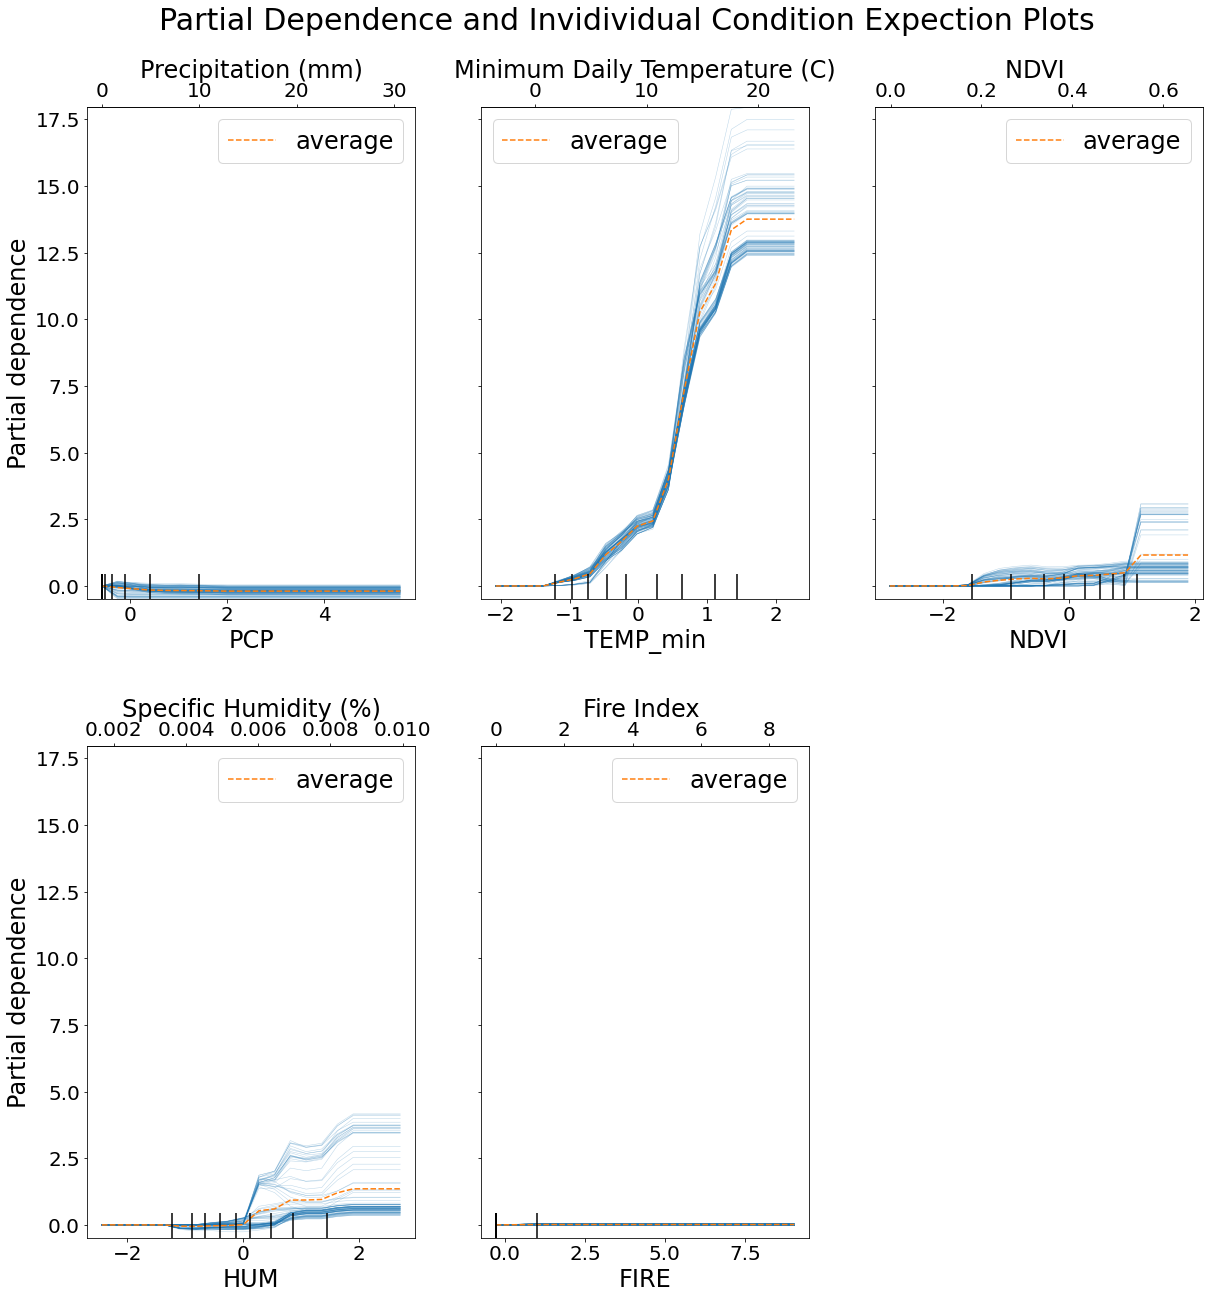

In [112]:
from sklearn.inspection import PartialDependenceDisplay
plt.rc('font', size=24)          # controls default text sizes
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('figure', titlesize=24)  # fontsize of the figure title


#one way PDP and ICE
common_params = {
    "subsample": 100,
    "n_jobs": -1,
    "grid_resolution": 20,
    "centered": True,
    "random_state": 45,
}

fig, ax = plt.subplots(figsize=(20, 20))

X_full = prepare_data([full_dataset], columns=temp_min_cols + fire_cols)[0]
display = PartialDependenceDisplay.from_estimator(
    load("final_models/temp_min_fire.pkl"),
    X_full,
    features=temp_min_cols + fire_cols,
    feature_names=temp_min_cols + fire_cols,
    kind="both",
    ax=ax,
    percentiles=(0.0, 1),
    **common_params,
)

#looks
display.figure_.suptitle(
    "Partial Dependence and Invidividual Condition Expection Plots", fontsize=30
)
display.figure_.subplots_adjust(hspace=0.3)
# display.figure_.tight_layout()
display.figure_.subplots_adjust(top=0.91)

#making the top x-axis
def func_gen(column):
    return lambda x: column.mean() + x * column.std(), lambda x: (x - column.mean()) / column.std()

#change the x axis back to original values
axes = display.axes_.flatten()
print(axes)
cols = temp_min_cols + fire_cols
y_labels = [full_names[x] + " " + units[x] for x in temp_min_cols + fire_cols]
for i in range(len(axes)):
    a = axes[i]
    if a is not None:
        to, fro = func_gen(train_dataset[cols[i]])
        secax = a.secondary_xaxis('top', functions=(to, fro))
        secax.set_xlabel(y_labels[i])

[('Hum', 'Precip'), ('Hum', 'NDVI'), ('Hum', 'Temp_Min'), ('Hum', 'Fire'), ('Precip', 'NDVI'), ('Precip', 'Temp_Min'), ('Precip', 'Fire'), ('NDVI', 'Temp_Min'), ('NDVI', 'Fire'), ('Temp_Min', 'Fire')]


C:\Users\raymo\Documents\Github\geron-ML-learning\env\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:1249: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(XX, YY, Z, levels=Z_level, linewidths=0.5, colors="k")


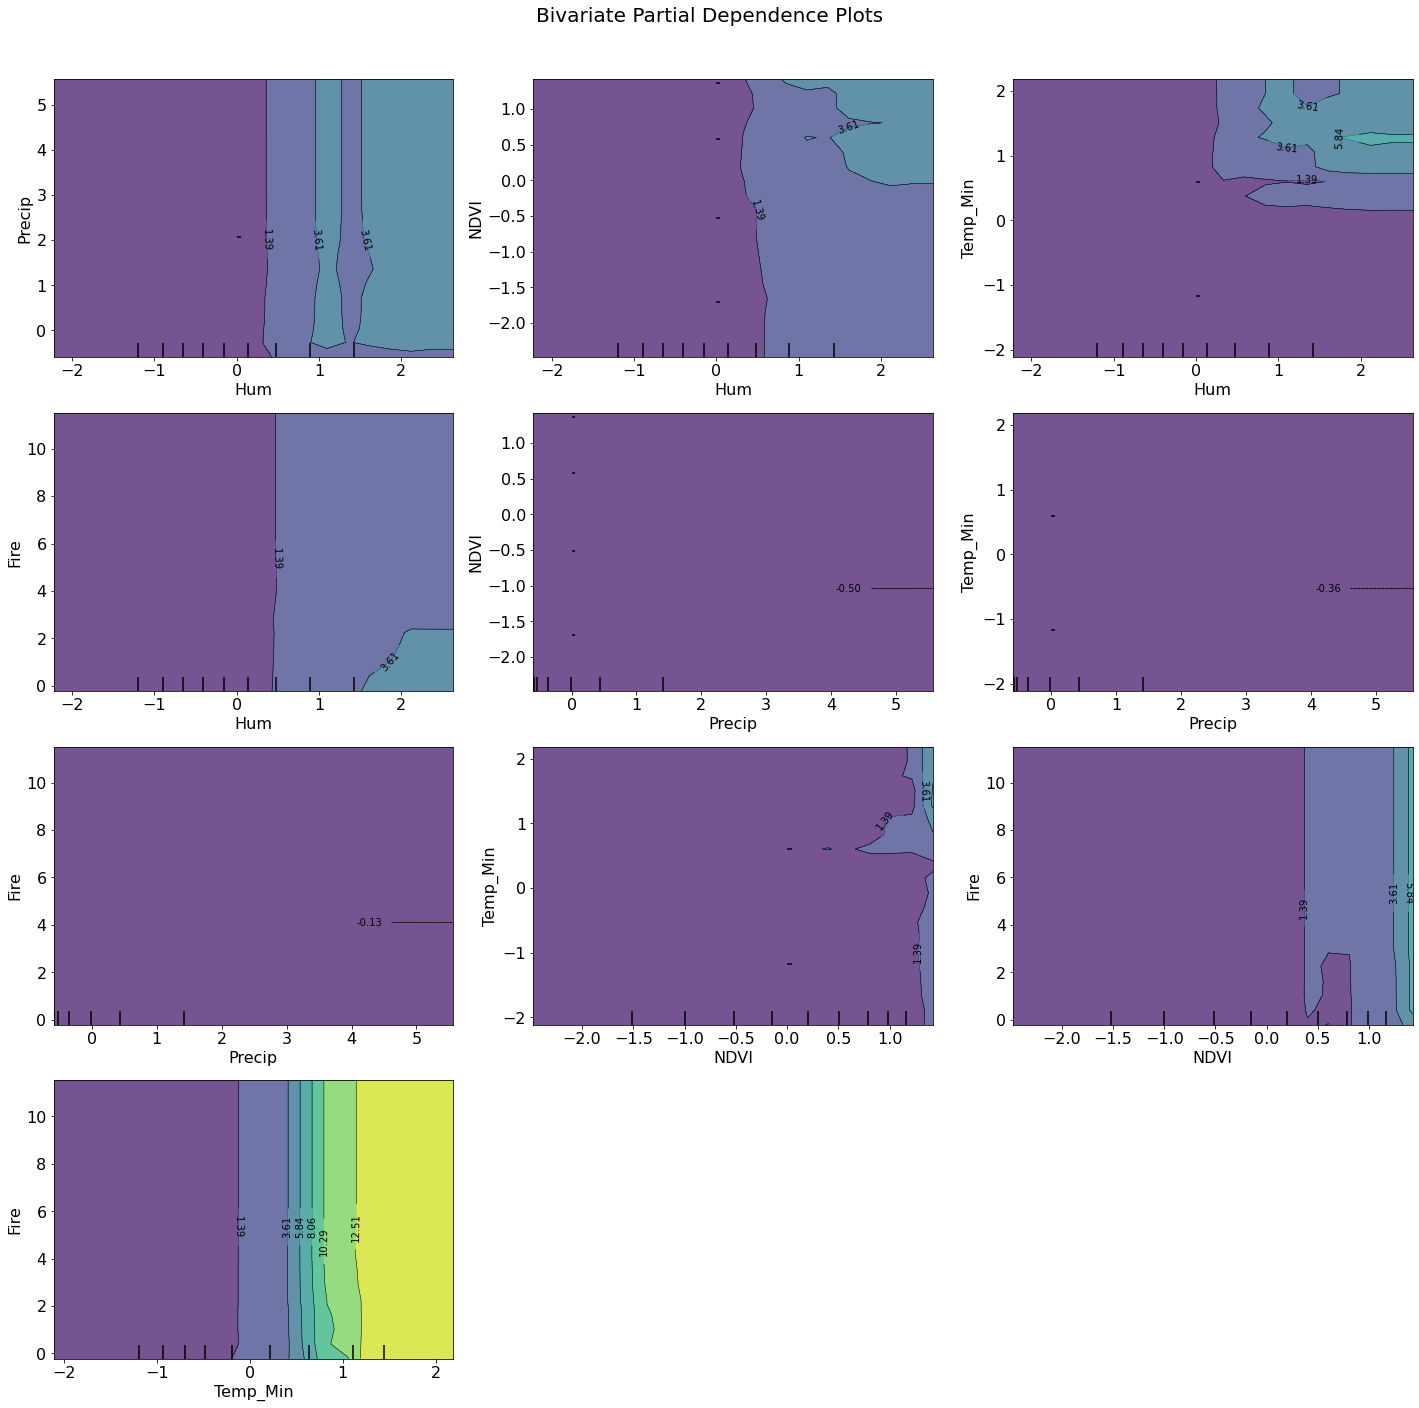

In [31]:
#two way pdp
#TODO why x and y axis result in different plots
def generate_twoway(features):
    output = []
    for i, f in enumerate(features):
        for of in features[i + 1:]:
            output.append((f, of))
    return output

plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(20, 20))

twoway_features = generate_twoway(["Hum", "Precip", "NDVI", "Temp_Min"] + fire_cols)
print(twoway_features)

display = PartialDependenceDisplay.from_estimator(
    load("final_models/temp_min_fire.pkl"),
    X_full,
    features=twoway_features,
    feature_names=temp_min_cols + fire_cols,
    kind="average",
    ax=ax,
    percentiles=(0.0, 1),
    **common_params,
)

#looks
display.figure_.suptitle(
    "Bivariate Partial Dependence Plots", fontsize=20
)
display.figure_.subplots_adjust(hspace=0.2)
display.figure_.tight_layout()
display.figure_.subplots_adjust(top=0.93)

#TODO put real value axis for these
#making the top x-axis
# def func_gen(column):
#     return lambda x: column.mean() + x * column.std(), lambda x: (x - column.mean()) / column.std()

# #change the x axis back to original values
# axes = display.axes_.flatten()
# print(axes)
# cols = temp_min_cols + fire_cols
# y_labels = [full_names[x] + " " + units[x] for x in temp_min_cols + fire_cols]
# for i in range(len(axes)):
#     a = axes[i]
#     if a is not None:
#         to, fro = func_gen(train_dataset[cols[i]])
#         secax = a.secondary_xaxis('top', functions=(to, fro))
#         secax.set_xlabel(y_labels[i])

## Prediction VS Actual

### Test Set

In [91]:
#create predictions
X_test = prepare_data([test_dataset], temp_min_cols + fire_cols)[0]
predictions = load("final_models/temp_min_fire.pkl").predict(X_test)
predictions = pd.Series(predictions)
print(predictions)
actual = test_labels.reset_index(drop=True)
print(actual)
print(root_mean_squared_error(predictions, actual))

#create dataframe for plotting
plotter = pd.concat([predictions, actual, test_dataset["Date"].reset_index(drop=True)], axis=1)
plotter.columns = ["Predictions", "Actual", "Date"]
plotter.set_index("Date", inplace=True, drop=True)
plotter.sort_index(inplace=True)
plotter

0      15.078373
1      11.436045
2       0.642765
3       3.281091
4       3.163881
         ...    
126    17.553017
127     2.417189
128     0.246450
129     2.161097
130     0.908388
Length: 131, dtype: float64
0       9.500000
1       8.820513
2       1.666667
3       5.400000
4       4.553191
         ...    
126    31.253731
127     3.888889
128     0.000000
129     0.000000
130     2.714286
Name: Mosquito, Length: 131, dtype: float64
4.1204965373322855


,Predictions,Actual
Date,,
2010-01-31,0.397421,0.000000
2010-03-21,1.049300,0.000000
2010-04-18,2.192228,0.000000
2010-05-02,2.563094,2.400000
2010-05-09,2.723852,2.142857
...,...,...
2022-03-06,1.026449,5.700000
2022-03-27,2.535678,2.153846
2022-04-24,2.523417,3.310345


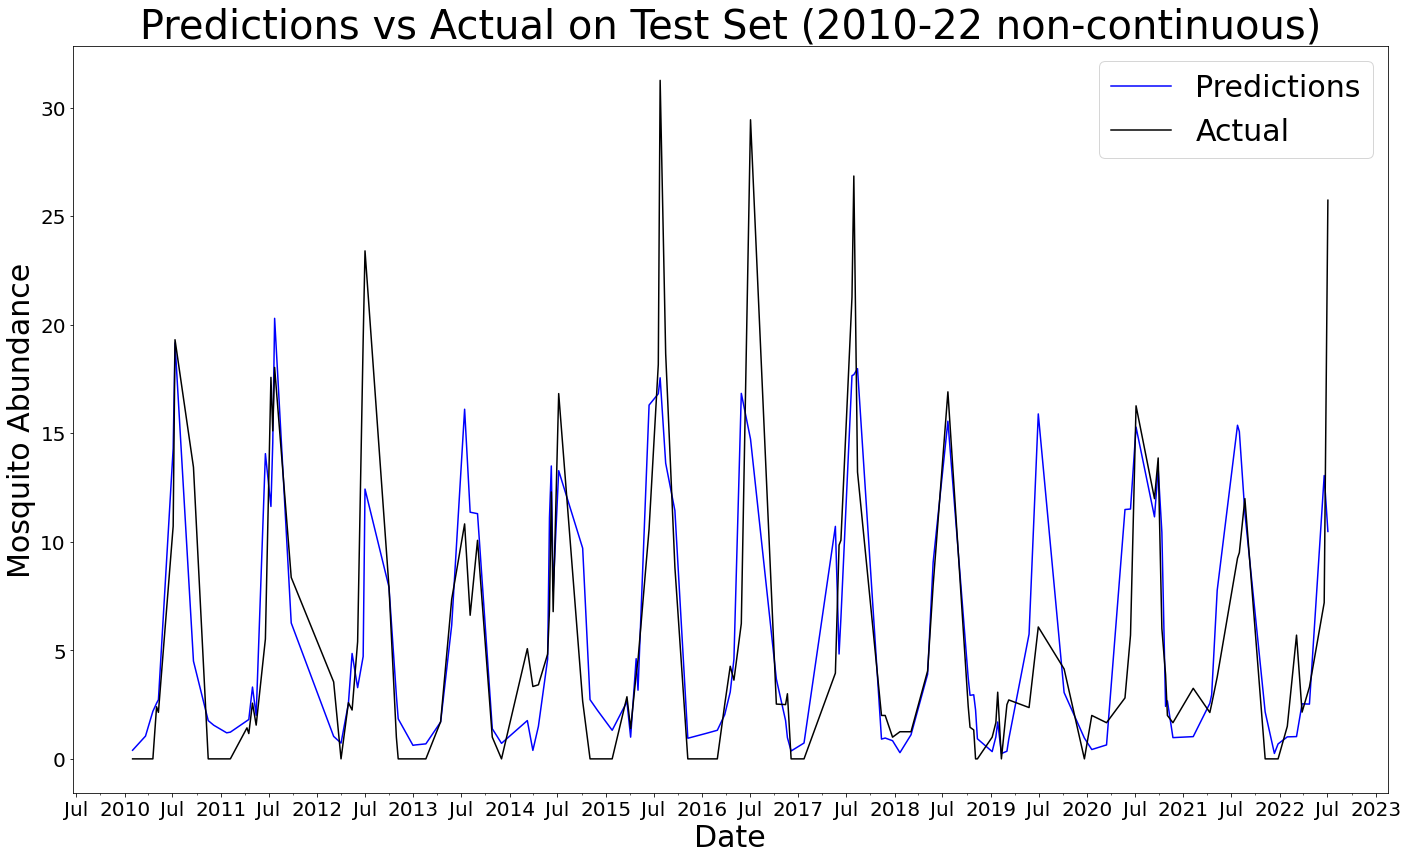

In [99]:
plt.rcParams.update({'font.size': 30})

ax = plotter.plot(
    use_index=True, y=["Predictions", "Actual"], 
    kind="line", figsize=(20, 12),
    color=["blue", "black"],
    x_compat=True,
    fontsize=16,
    xlabel="Date",
    ylabel="Mosquito Abundance",
    title="Predictions vs Actual on Test Set (2010-22 non-continuous)"
    )

fig = ax.get_figure()
fig.tight_layout()
fig.subplots_adjust(top=0.965)

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

ax.set_title(ax.get_title(), fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.tick_params(axis='both', which='minor', labelsize=8)
# ax.set_ylabel(ax.get_ylabel(), fontsize=30)
# ax.set_xlabel(ax.get_xlabel(), fontsize=30)

## 2017-2019

In [67]:
#create train set
criterion = full_dataset['Week'].map(lambda x: (x.year < 2017) | (x.year > 2019))
train_dataset_ = full_dataset[criterion]
train_dataset_.reset_index(inplace=True, drop=True)
train_labels_ = train_dataset_["Mosquito"]

#create test set
criterion = full_dataset['Week'].map(lambda x: x not in list(train_dataset_["Week"]))
test_dataset_ = full_dataset[criterion]
test_dataset_.reset_index(inplace=True, drop=True)
test_labels_ = test_dataset_["Mosquito"]

#train new model using new set
X_train_, X_test_ = prepare_data([train_dataset_, test_dataset_], temp_min_cols + fire_cols)
rf_ = clone(load("final_models/temp_min_fire.pkl"))
rf_.fit(X_train_, train_labels_)

print(calc_accuracy(rf_, X_test_, test_labels_, [r2_score, mean_absolute_error, root_mean_squared_error]))

                         Measurement
Metric                              
r2_score                    0.661130
mean_absolute_error         2.367162
root_mean_squared_error     3.331268


In [68]:
#run predictions
predictions = rf_.predict(X_test_)
predictions = pd.Series(predictions)
actual = test_dataset_["Mosquito"]

#create plotter dataset
plotter = pd.concat([predictions, actual, test_dataset_["Date"]], axis=1)
plotter.columns = ["Predictions", "Actual", "Date"]
plotter.set_index("Date", drop=True, inplace=True)
plotter.sort_index(inplace=True)
plotter

3.331267769107969


,Predictions,Actual
Date,,
2017-01-01,0.253014,0.0
2017-01-08,0.399448,0.0
2017-01-15,0.308064,0.0
2017-01-22,0.283593,0.0
2017-01-29,0.652471,0.0
...,...,...
2019-11-24,0.313103,1.0
2019-12-01,0.272555,1.0
2019-12-08,0.906575,0.0


Text(0.5, 82.0, 'Date')

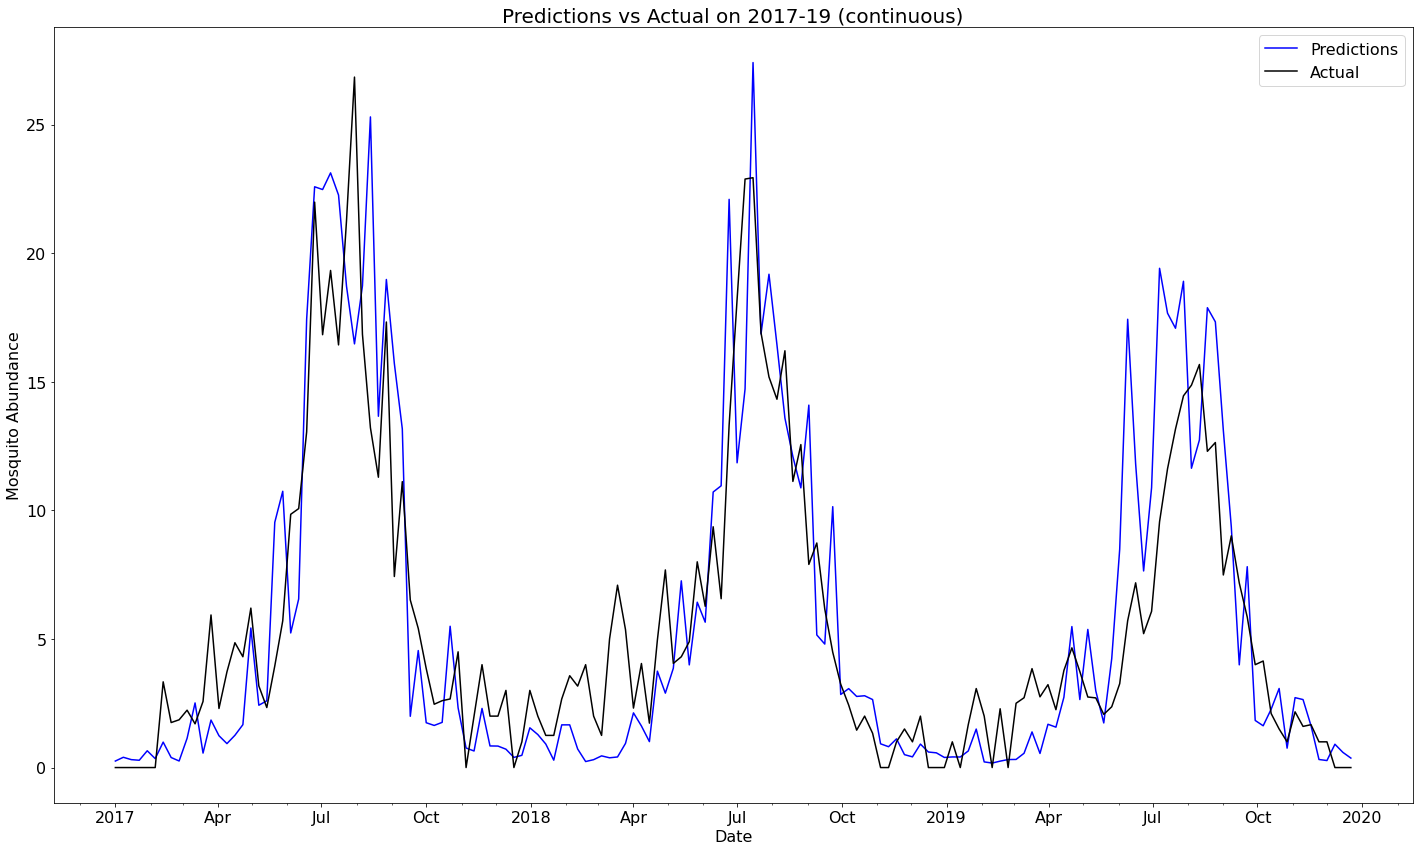

In [74]:
plt.rcParams.update({'font.size': 16})

ax = plotter.plot(
    use_index=True, y=["Predictions", "Actual"], 
    kind="line", figsize=(20, 12),
    color=["blue", "black"],
    x_compat=True,
    fontsize=16,
    xlabel="Date",
    ylabel="Mosquito Abundance",
    title="Predictions vs Actual on 2017-19 (continuous)"
    )

fig = ax.get_figure()
fig.tight_layout()
fig.subplots_adjust(top=0.965)

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

ax.set_title(ax.get_title(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=16)
ax.set_xlabel(ax.get_xlabel(), fontsize=16)